In [2]:
import nltk
import inflect
import contractions
from bs4 import BeautifulSoup
import re, string, unicodedata
from nltk import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import LancasterStemmer, WordNetLemmatizer
from sklearn.preprocessing import LabelEncoder 
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import nltk
nltk.download('stopwords')
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from string import punctuation
import re
from collections import Counter
from nltk import ngrams
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM
import pandas as pd

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [26]:
from keras.preprocessing.text import Tokenizer
from keras_preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Dense, Embedding, LSTM
from keras.utils.np_utils import to_categorical
from keras.callbacks import ModelCheckpoint
from keras.models import load_model
from keras.optimizers import Adam

In [4]:
df = pd.read_csv("spam.csv",encoding = "ISO-8859-1")
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [12]:
df = df.drop(["Unnamed: 2","Unnamed: 3","Unnamed: 4"], axis=1)
df.replace("", float("NaN"), inplace=True)
df.dropna(inplace=True)
df.rename(columns = {"v1" : "label", "v2":"text"},inplace = True)
df.head()

,label,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [13]:
df["label"] = df["label"].map({"ham": 0, "spam": 1})
df.head()

,label,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [14]:
 def cleansing(text):
    text = str(text)
    print(text)
    
    text =  text.lower() 
    text = re.sub(r'http\S+', '', text)
    text = re.sub('(@\w+|#\w+)', '', text)
    text = re.sub('<.*?>', '', text)
    text = re.sub('[^a-zA-Z]', ' ', text)
    text = re.sub("\n", " ", text)
    text = re.sub('(s{2,})', ' ', text)
    text = text
    
    return text

In [15]:
 def perform_oversampling(df):
    df_spam= df[df['label'] == 1]
    df_ham = df[df['label'] == 0]
    df_low_oversampled = df_ham.sample(df_spam.shape[0], replace=True)
    return pd.concat([df_low_oversampled, df_spam], axis=0)

print('Original data:')
print(df['label'].value_counts())

df_balanced = perform_oversampling(df)

print('-'*10)
print('After oversampling:')
print(df_balanced['label'].value_counts())

Original data:
0    4825
1     747
Name: label, dtype: int64
----------
After oversampling:
0    747
1    747
Name: label, dtype: int64


In [16]:
df1['text'] = df1['text'].apply(cleansing)
df1.head()

Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...
Ok lar... Joking wif u oni...
Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's
U dun say so early hor... U c already then say...
Nah I don't think he goes to usf, he lives around here though
FreeMsg Hey there darling it's been 3 week's now and no word back! I'd like some fun you up for it still? Tb ok! XxX std chgs to send, å£1.50 to rcv
Even my brother is not like to speak with me. They treat me like aids patent.
As per your request 'Melle Melle (Oru Minnaminunginte Nurungu Vettam)' has been set as your callertune for all Callers. Press *9 to copy your friends Callertune
WINNER!! As a valued network customer you have been selected to receivea å£900 prize reward! To claim call 09061701461. Claim code KL341. Valid 12 hours only.
Had your mobile 11 months or more? U R enti

,label,text
0,0,go until jurong point crazy available only ...
1,0,ok lar joking wif u oni
2,1,free entry in a wkly comp to win fa cup fina...
3,0,u dun say so early hor u c already then say
4,0,nah i don t think he goes to usf he lives aro...


In [17]:
from sklearn.model_selection import train_test_split

training_data, testing_data = train_test_split(df_balanced,stratify=df_balanced['label'], test_size=0.2, random_state=25)
training_data['label'].value_counts()

1    598
0    597
Name: label, dtype: int64

In [18]:
y = training_data['label']
X = training_data['text']

y_test = testing_data['label']
X_test = testing_data['text']

In [19]:
from sklearn.model_selection import train_test_split
X = df[['text']]
y = df[['label']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [29]:
y = training_data['label']
X = training_data['text']

y_test = testing_data['label']
X_test = testing_data['text']
tf.convert_to_tensor(X)

<tf.Tensor: shape=(1195,), dtype=string, numpy=
array([b'Hey i booked the kb on sat already... what other lessons are we going for ah? Keep your sat night free we need to meet and confirm our lodging ',
       b'Ugh. Gotta drive back to sd from la. My butt is sore.',
       b'Can U get 2 phone NOW? I wanna chat 2 set up meet Call me NOW on 09096102316 U can cum here 2moro Luv JANE xx Calls\xc3\xa5\xc2\xa31/minmoremobsEMSPOBox45PO139WA',
       ...,
       b'This weeks SavaMob member offers are now accessible. Just call 08709501522 for details! SavaMob, POBOX 139, LA3 2WU. Only \xc3\xa5\xc2\xa31.50/week. SavaMob - offers mobile!',
       b'Please dont say like that. Hi hi hi',
       b"How would my ip address test that considering my computer isn't a minecraft server"],
      dtype=object)>

In [30]:
BATCH_SIZE = 32
train_ds = tf.data.Dataset.from_tensor_slices((X, y))
test_ds = tf.data.Dataset.from_tensor_slices((X_test, y_test))
# train_ds, val_ds, test_ds = get_dataset_partitions_tf(datatext, shuffle=True)       # Split into train, val, and test datasets

# train_ds = train_ds.shuffle(BUFFER_SIZE).batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)
train_ds = train_ds.batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)
# val_ds = val_ds.batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)
test_ds = test_ds.batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)

In [31]:
VOCAB_SIZE = 768

encoder = tf.keras.layers.TextVectorization(max_tokens=VOCAB_SIZE)
encoder.adapt(train_ds.map(lambda text, label: text))

In [32]:
 def model_create():
    model1=Sequential()
    model1.add(encoder)
    model1.add(tf.keras.layers.Embedding(
        input_dim=len(encoder.get_vocabulary()),
        output_dim=64,
        # Use masking to handle the variable sequence lengths
        mask_zero=True))

    model1.add(LSTM(32,return_sequences=False))
    model1.add(Dropout(0.2))

    # model.add(LSTM(32,return_sequences=False))
    # model.add(Dropout(0.2))

    model1.add(Dense(32,activation='relu'))
    model1.add(Dropout(0.2))
    model1.add(Dense(1,activation='sigmoid'))
    
    return model1

In [33]:
model1 = model_create()
model1.compile(loss='binary_crossentropy',optimizer="adam",metrics=['accuracy'])
history = model1.fit(train_ds, validation_data=test_ds, epochs=20)

Epoch 1/20
38/38 [==============================] - 6s 49ms/step - loss: 0.6432 - accuracy: 0.7849 - val_loss: 0.4500 - val_accuracy: 0.8896
Epoch 2/20
38/38 [==============================] - 1s 18ms/step - loss: 0.2458 - accuracy: 0.9423 - val_loss: 0.2047 - val_accuracy: 0.9365
Epoch 3/20
38/38 [==============================] - 1s 18ms/step - loss: 0.1152 - accuracy: 0.9707 - val_loss: 0.1340 - val_accuracy: 0.9699
Epoch 4/20
38/38 [==============================] - 1s 19ms/step - loss: 0.0671 - accuracy: 0.9816 - val_loss: 0.1342 - val_accuracy: 0.9699
Epoch 5/20
38/38 [==============================] - 1s 18ms/step - loss: 0.0437 - accuracy: 0.9908 - val_loss: 0.1913 - val_accuracy: 0.9465
Epoch 6/20
38/38 [==============================] - 1s 19ms/step - loss: 0.0348 - accuracy: 0.9925 - val_loss: 0.1754 - val_accuracy: 0.9532
Epoch 7/20
38/38 [==============================] - 1s 19ms/step - loss: 0.0228 - accuracy: 0.9967 - val_loss: 0.1795 - val_accuracy: 0.9532
Epoch 8/20
38

In [35]:
import numpy as np 
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
import seaborn as sns

y_predict = np.where(model1.predict(X_test)> 0.5,1,0)
print(classification_report(y_test, y_predict))

10/10 [==============================] - 0s 5ms/step
              precision    recall  f1-score   support

           0       0.95      0.93      0.94       150
           1       0.93      0.95      0.94       149

    accuracy                           0.94       299
   macro avg       0.94      0.94      0.94       299
weighted avg       0.94      0.94      0.94       299



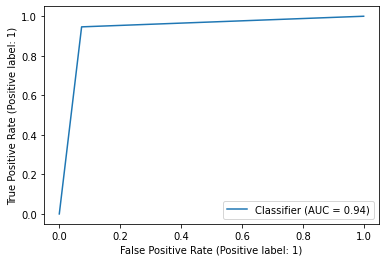

In [36]:
 from sklearn.metrics import RocCurveDisplay

RocCurveDisplay.from_predictions(y_test, y_predict)

<AxesSubplot:>

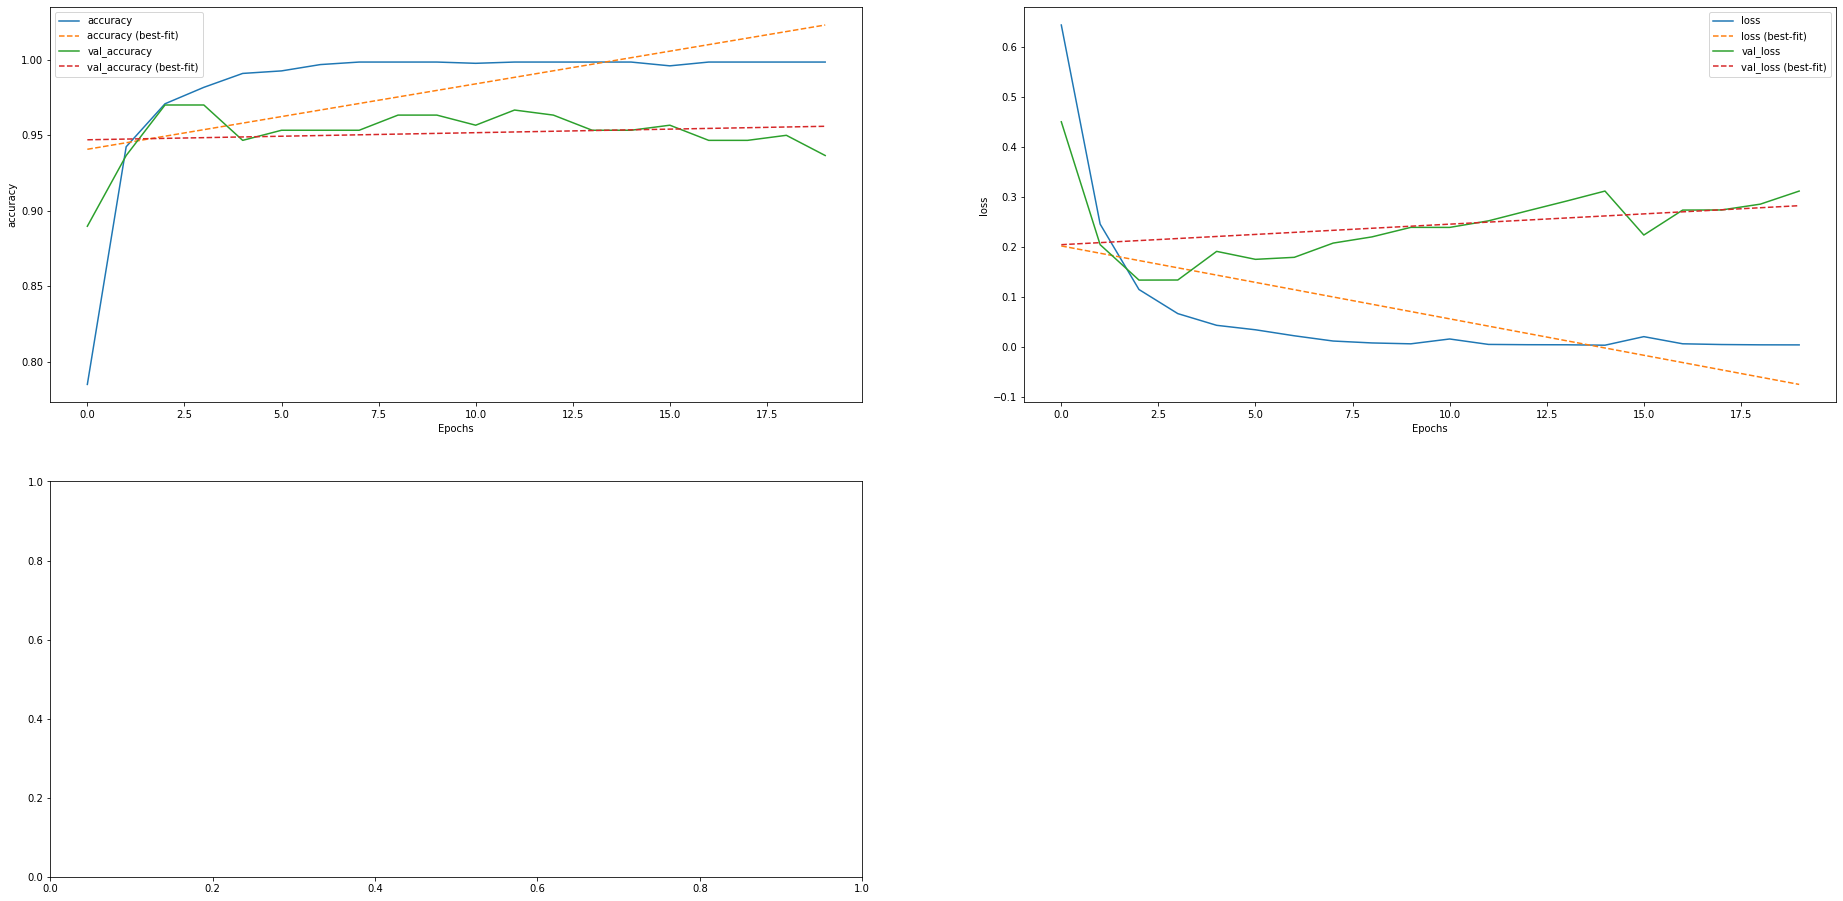

In [37]:
 import matplotlib.pyplot as plt
import numpy as np

def plot_graphs(history, metric):
    y = history.history[metric]
    y_val = history.history['val_'+metric]
    x = [i for i in range(len(y))]

    plt.plot(y)
    plt.plot(x, np.poly1d(np.poly1d(np.polyfit(x, y, 1))(x)), '--')
    plt.plot(y_val, '')
    plt.plot(x, np.poly1d(np.poly1d(np.polyfit(x, y_val, 1))(x)), '--')
    plt.xlabel("Epochs")
    plt.ylabel(metric)
    plt.legend([metric, f'{metric} (best-fit)', 'val_'+metric, f'val_{metric} (best-fit)'])

plt.figure(figsize=(32, 16))
plt.subplot(2, 2, 1)
plot_graphs(history, 'accuracy')
plt.subplot(2, 2, 2)
plot_graphs(history, 'loss')
plt.subplot(2, 2, 3)

In [38]:
from keras.models import load_model
    
model1.save('model-lstm') 

INFO:tensorflow:Assets written to: model-lstm\assets


INFO:tensorflow:Assets written to: model-lstm\assets
